In [20]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

In [2]:
Xtest = np.load("G:/Video_Forgery_Detection_Using_Machine_Learning/video_tampering_dataset/Xtrain.npy")
Ytest = np.load("G:/Video_Forgery_Detection_Using_Machine_Learning/video_tampering_dataset/Ytrain.npy")

In [3]:
print(Xtest.shape)
print(Ytest.shape)

(6990, 240, 320, 3)
(6990,)


In [5]:
model = load_model("G:/Video_Forgery_Detection_Using_Machine_Learning/ResNet50_Model/forgery_model.hdf5")

In [6]:
outputs = model.predict(Xtest)

In [8]:
outputs = outputs.reshape((-1))
print(outputs.shape)

(6990,)


In [11]:
for i in range(outputs.shape[0]):
    if outputs[i] > 0.5:
        outputs[i] = 1
    else:
        outputs[i] = 0

In [13]:
print(outputs)

[0. 0. 0. ... 1. 0. 0.]


In [14]:
positiveCount = 0
for i in range(Xtest.shape[0]):
    if outputs[i] == Ytest[i]:
        positiveCount +=1

print("Test Accuracy = ",positiveCount/Ytest.shape[0])

Test Accuracy =  0.7971387696709585


In [15]:
from sklearn.metrics import classification_report,confusion_matrix
from visualize import plot_confusion_matrix

In [16]:
print(classification_report(outputs,Ytest))

              precision    recall  f1-score   support

         0.0       0.96      0.81      0.88      6227
         1.0       0.31      0.70      0.43       763

    accuracy                           0.80      6990
   macro avg       0.63      0.75      0.65      6990
weighted avg       0.89      0.80      0.83      6990



In [17]:
cnf_matrix = confusion_matrix(outputs,Ytest)
print(cnf_matrix)

[[5041 1186]
 [ 232  531]]


Confusion matrix, without normalization
[[5041 1186]
 [ 232  531]]


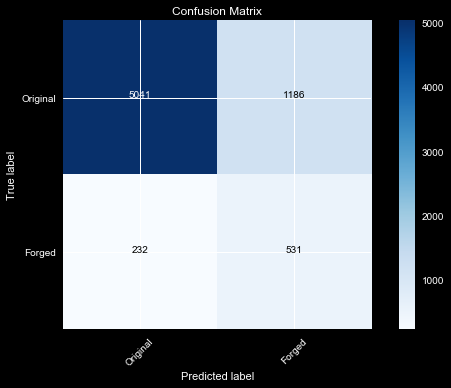

In [23]:
plt.style.use('dark_background')
plot_confusion_matrix(cnf_matrix,classes = ["Original","Forged"],title="Confusion Matrix")